# Proyek Analisis Data - DICODING

# Import Library yang dibutuhkan untuk data analsis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Data Wrangling

## Gathering Data
Pada kode dibawah ini dilakukan pengumpulan data, lebih tepatnya mengambil dataset publik dari `Kaggle` denga `API`

In [2]:
# Membuat file kaggle.json dengan API token Anda
api_token = {"username":"krisnandi9998","key":"2d15c9eb5dd2bb51786765892d7218d9"}

# Membuat folder kaggle dan menyimpan token API
!mkdir -p ~/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Mengubah izin akses untuk file API
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset menggunakan API Kaggle
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 13.2MB/s]


setelah dilkukan pengunduhan data selanjutnya dilakuan unzip data untuk mengetahui dataset yang sudah kita unduh karena saat terunduk dalam bentuk `ZIP`

In [3]:
!unzip bike-sharing-dataset.zip

Archive:  bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


## Assessing Data

### Mengecek Data Awal


Pada proses assesing data yang pertama kita muat dahulu dataset kita kedalam dataframe, dan melihat informasi awal pada data kita

In [4]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

df_day.info()
print('\n')
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (t

Dari tampilan di atas bisa diketahui dari data keduanya tidak ada nilai yang hilang dan beberapa informasi lain diantranya
1. Dataset `day.csv`
  * Memiliki 731 Baris dan 16 Kolom
  * Tipe Data
    * float64: 4 kolom (temp, atemp, hum, windspeed)
    * int64: 11 kolom (instant, season, yr, mnth, holiday, weekday, workingday, weathersit, casual, registered, cnt)
    * object: 1 kolom (dteday, yang menyimpan tanggal)

2. Dataset `hour.csv`
  * Memiliki 17379 Baris dan 17 Kolom
  * Tipe Data:
    * float64: 4 kolom (temp, atemp, hum, windspeed)
    * int64: 12 kolom (instant, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, casual, registered, cnt)
    * object: 1 kolom (dteday)




### Mengecek Outlier


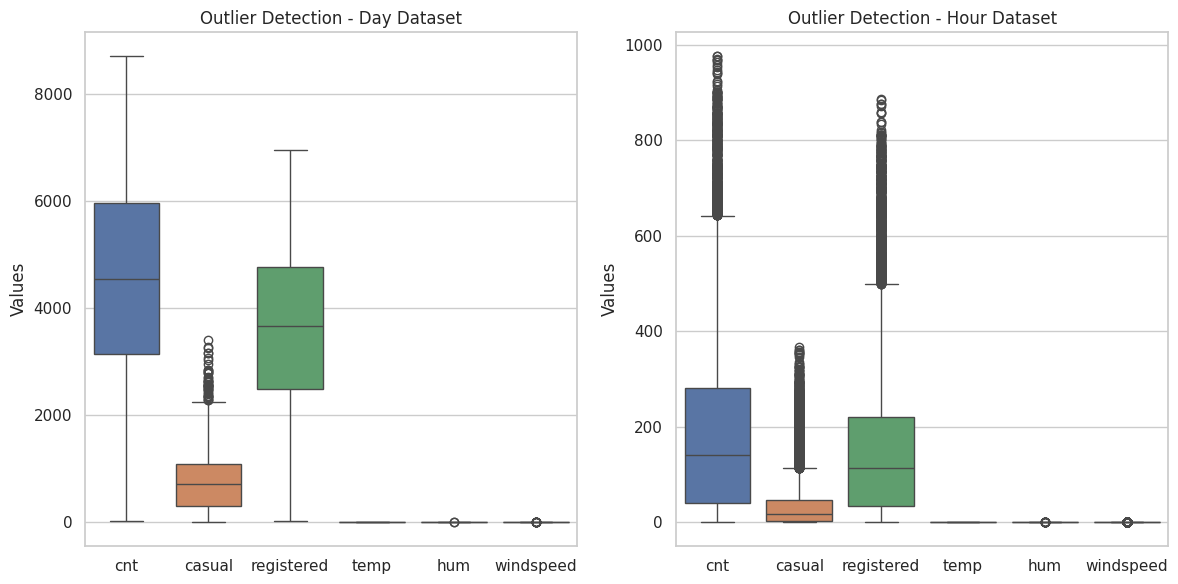

In [5]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat boxplot untuk mendeteksi outlier di dataset harian
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_day[['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']])
plt.title('Outlier Detection - Day Dataset')
plt.ylabel('Values')

# Membuat boxplot untuk mendeteksi outlier di dataset per jam
plt.subplot(1, 2, 2)
sns.boxplot(data=df_hour[['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']])
plt.title('Outlier Detection - Hour Dataset')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

Boxplot dari kedua dataset tersebut berisikan informasi

1. Dataset `day.csv`
  * cnt (Total Penyewaan), casual (Pengguna Tidak Terdaftar), registered (Pengguna Terdaftar), temp (Suhu), hum (Kelembaban), dan windspeed (Kecepatan Angin) semuanya ditampilkan
  * Terdapat beberapa outlier yang terlihat pada variabel cnt, casual, dan registered, di mana nilaiNYA jauh lebih tinggi dibandingkan dengan data lainnya

2. Dataset `hour.csv`

  * Boxplot menunjukkan distribusi yang serupa, dengan adanya outlier pada variabel cnt dan casual
  * Beberapa nilai penyewaan juga menunjukkan adanya outlier, tetapi jumlahnya lebih sedikit dibandingkan dengan dataset `day.csv`

Setelah melihat berdasarkan visual, selanjutnya mencari tahu jumlah pasti dari outlier tersebut

In [6]:
# Fungsi untuk menghitung jumlah outlier menggunakan metode IQR
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil pertama
    Q3 = data[column].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Jarak interkuartil
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah untuk outlier
    upper_bound = Q3 + 1.5 * IQR  # Batas atas untuk outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]  # Data outlier
    return outliers.shape[0]  # Mengembalikan jumlah outlier

# Daftar kolom yang akan diperiksa untuk outlier
day_columns = ['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']
hour_columns = ['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']

# Menghitung jumlah outlier di dataset harian
day_outliers_count = {column: count_outliers(df_day, column) for column in day_columns}

# Menghitung jumlah outlier di dataset per jam
hour_outliers_count = {column: count_outliers(df_hour, column) for column in hour_columns}

day_outliers_count, hour_outliers_count

({'cnt': 0,
  'casual': 44,
  'registered': 0,
  'temp': 0,
  'hum': 2,
  'windspeed': 13},
 {'cnt': 505,
  'casual': 1192,
  'registered': 680,
  'temp': 0,
  'hum': 22,
  'windspeed': 342})

## Cleaning Data

Setelah di cek data oulier pada dataset ini lumayan banyak, selanjutnya kita coba untuk ganti data outlier tersebut

### Mengganti data outlier

In [7]:
# Mengganti outlier dengan nilai median untuk setiap kolom yang memiliki outlier
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai yang lebih kecil dari lower_bound atau lebih besar dari upper_bound dengan median
    median_value = data[column].median()
    data[column] = data[column].apply(lambda x: median_value if (x < lower_bound or x > upper_bound) else x)

# Mengganti outlier di dataset day
for column in day_columns:
    replace_outliers_with_median(df_day, column)

# Mengganti outlier di dataset hour
for column in hour_columns:
    replace_outliers_with_median(df_hour, column)

# Memeriksa kembali jumlah outlier setelah penggantian
day_outliers_count_after = {column: count_outliers(df_day, column) for column in day_columns}
hour_outliers_count_after = {column: count_outliers(df_hour, column) for column in hour_columns}

day_outliers_count_after, hour_outliers_count_after

({'cnt': 0,
  'casual': 18,
  'registered': 0,
  'temp': 0,
  'hum': 0,
  'windspeed': 4},
 {'cnt': 211,
  'casual': 822,
  'registered': 302,
  'temp': 0,
  'hum': 0,
  'windspeed': 0})

Setelah dilakukan penggantian data outlier dengan nilai median, masih terdapat banyak banyak outlier pada dataset hour

selanjutanya sisa outlier dataset hour kita hapus dan biarkan outiler pada dataset day

In [8]:
# Mengganti outlier di dataset day.csv dengan median
for column in day_columns:
    replace_outliers_with_median(df_day, column)

# Menghapus outlier di dataset hour.csv
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Menghapus outlier dari setiap kolom di dataset hour
for column in hour_columns:
    df_hour = remove_outliers(df_hour, column)


day_outliers_count_after = {column: count_outliers(df_day, column) for column in day_columns}
hour_outliers_count_after = {column: count_outliers(df_hour, column) for column in hour_columns}

day_outliers_count_after, hour_outliers_count_after

({'cnt': 0, 'casual': 6, 'registered': 0, 'temp': 0, 'hum': 0, 'windspeed': 0},
 {'cnt': 266,
  'casual': 468,
  'registered': 89,
  'temp': 0,
  'hum': 0,
  'windspeed': 0})

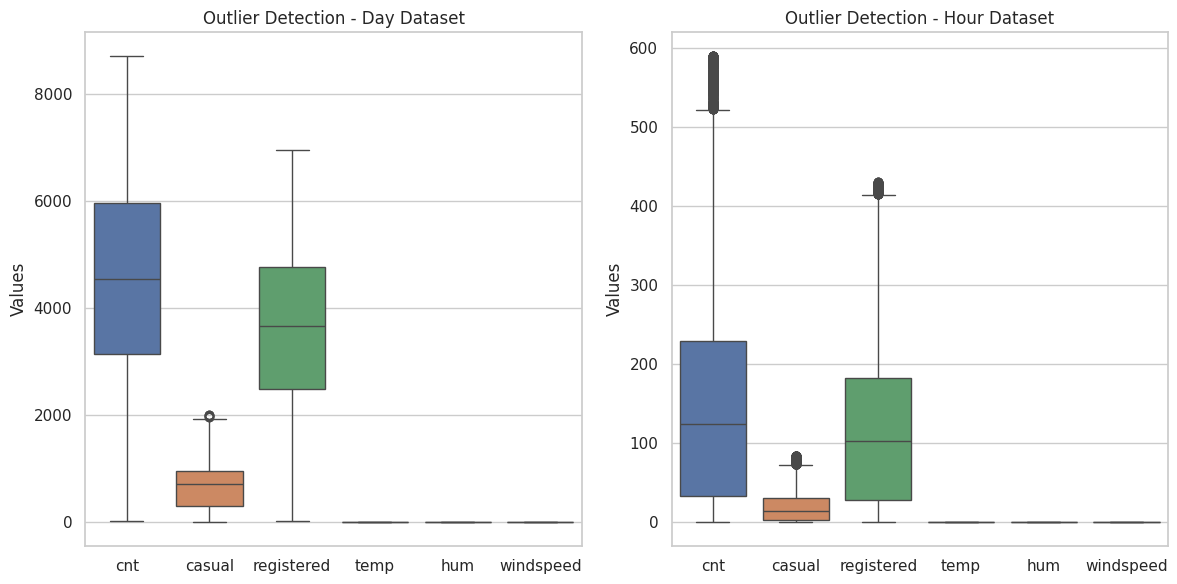

In [9]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat boxplot untuk mendeteksi outlier di dataset harian
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_day[['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']])
plt.title('Outlier Detection - Day Dataset')
plt.ylabel('Values')

# Membuat boxplot untuk mendeteksi outlier di dataset per jam
plt.subplot(1, 2, 2)
sns.boxplot(data=df_hour[['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']])
plt.title('Outlier Detection - Hour Dataset')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

Jika dilihat dari grafik yang dihasilkan, dirasa cukup untuk mengatasi outlier ini dikarenakan tidak terlalu signifikan perbedaannya

# Exploratory Data Analysis (EDA)

Pertanyaan untuk analisis data [Bike Sharing Datase](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)
1. Bagaimana hubungan antara jam dan jumlah penyewa ?
2. Seperti apa perbandingan penyewa di weekday, workingday dan holiday ?
3. Pada musim apa penyewa paling tinggi ?
4. Bagaimana tren penyewaan sepeda ?

In [10]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16018.000000,16018,16018.000000,16018.000000,16018.000000,16018.000000,16018.000000,16018.000000,16018.000000,16018.000000,16018.000000,16018.000000,16018.000000,16018.000000,16018.000000,16018.000000,16018.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8512.715195,NaN,2.478212,0.485953,6.493882,11.258397,0.029592,2.990448,0.684542,1.441254,0.485128,0.465507,0.637377,0.180927,20.290236,120.671932,152.369397
std,5033.331797,NaN,1.121926,0.499818,3.500568,7.040644,0.169463,1.998869,0.464712,0.648656,0.190684,0.170865,0.190398,0.110739,21.188737,103.392272,135.988303
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4156.250000,NaN,1.000000,0.000000,3.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.318200,0.490000,0.104500,3.000000,29.000000,34.000000
50%,8417.500000,NaN,2.000000,0.000000,6.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.480000,0.469700,0.650000,0.164200,14.000000,103.000000,124.000000
75%,12775.750000,NaN,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.790000,0.253700,31.000000,183.000000,229.000000


Dataset ini mencatat penyewaan sepeda berdasarkan waktu, kondisi cuaca, dan hari, mencakup 16.018 observasi dari tahun 2011-2012. Variabel penting meliputi musim, hari kerja, kondisi cuaca, serta suhu, kelembapan, dan kecepatan angin. Selain itu, data mencakup jumlah penyewaan dari pengguna kasual dan terdaftar. Statistik menunjukkan penyewaan sepeda bervariasi dengan rata-rata total penyewaan sekitar 152 sepeda per jam, dengan variasi yang cukup besar, mulai dari 1 hingga 590 sepeda. Dataset ini membantu memahami faktor-faktor yang memengaruhi pola peminjaman sepeda.

In [11]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.629352,0.185227,694.482900,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.139566,0.069742,448.998902,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.522291,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.228858,966.000000,4776.500000,5956.000000


Dataset ini terdiri dari 731 observasi yang mencatat penyewaan sepeda harian berdasarkan waktu, cuaca, dan kondisi lainnya. Variabel yang termasuk adalah tanggal (dteday), musim, tahun, bulan, hari libur, hari dalam seminggu, hari kerja, kondisi cuaca, suhu, kelembapan, dan kecepatan angin. Terdapat juga data jumlah pengguna kasual, pengguna terdaftar, dan total penyewaan sepeda (cnt). Rata-rata total penyewaan per hari adalah 4504 sepeda, dengan penyewaan minimum 22 dan maksimum 8714 sepeda. Distribusi data menunjukkan bahwa sebagian besar penyewaan terjadi pada hari-hari kerja dengan kondisi cuaca sedang dan suhu yang nyaman.

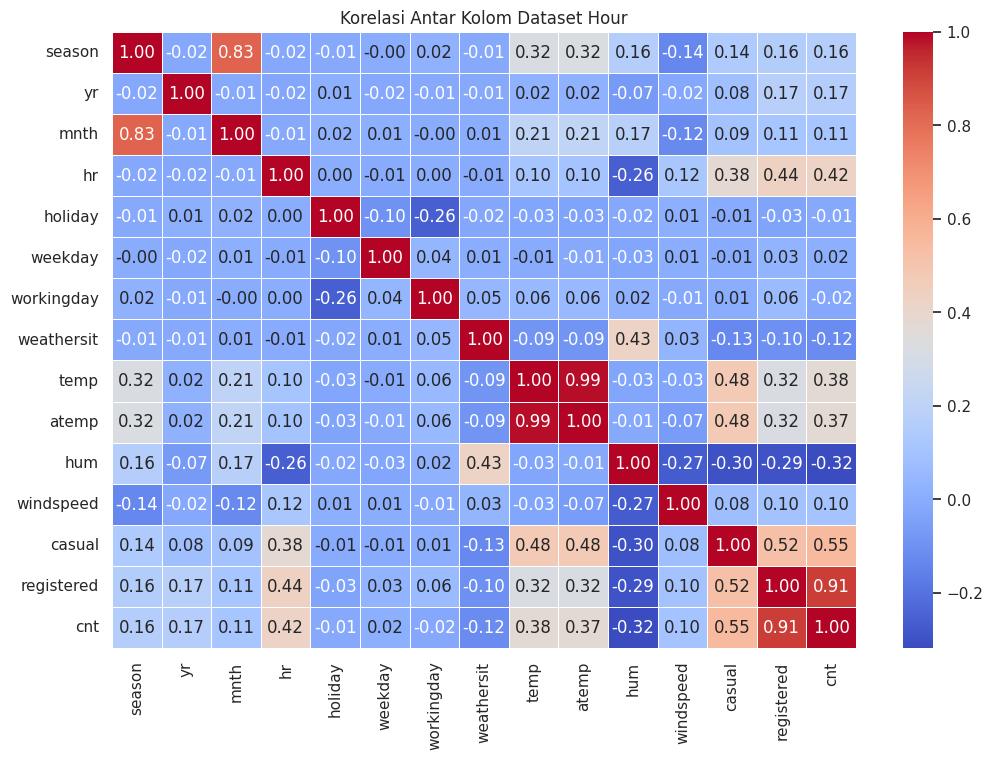

In [12]:
# Ubah kolom 'dteday' menjadi objek datetime jika belum.
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Ekstrak fitur numerik untuk perhitungan korelasi.
# Kecualikan 'dteday', 'instant', dan kolom non-numerik lainnya.
numerical_features = df_hour.select_dtypes(include=['number']).columns
numerical_features = numerical_features.drop(['instant'])  # Hapus 'instant' jika tidak relevan untuk korelasi
corr_matrix = df_hour[numerical_features].corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))  # Atur ukuran gambar
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Korelasi Antar Kolom Dataset Hour')  # Atur judul heatmap
plt.show()  # Tampilkan heatmap

Poin-poin penting dari matriks korelasi ini:
1. **Registered dan cnt** memiliki korelasi yang sangat tinggi (**0.91**), menunjukkan bahwa jumlah penyewa terdaftar sangat memengaruhi total penyewaan.
2. **Casual dan cnt** juga memiliki korelasi positif (**0.55**), namun lebih lemah dibandingkan dengan penyewa terdaftar.
3. **Temperature (temp, atemp)** menunjukkan korelasi positif moderat dengan total penyewaan (sekitar **0.38 dan 0.37**), menunjukkan bahwa semakin nyaman suhu, semakin tinggi jumlah penyewaan.
4. **Windspeed dan cnt** menunjukkan korelasi negatif (**-0.10**), artinya semakin tinggi kecepatan angin, semakin kecil kemungkinan orang akan menyewa sepeda.
5. **Humidity (hum)** memiliki korelasi negatif (**-0.32**) dengan jumlah penyewaan, artinya kelembapan yang lebih tinggi cenderung menurunkan jumlah penyewaan.
6. **Hr (jam)** menunjukkan korelasi yang cukup kuat dengan **casual** (**0.48**) dan **registered** (**0.44**), menunjukkan bahwa waktu dalam sehari memiliki dampak yang signifikan terhadap penyewaan sepeda.


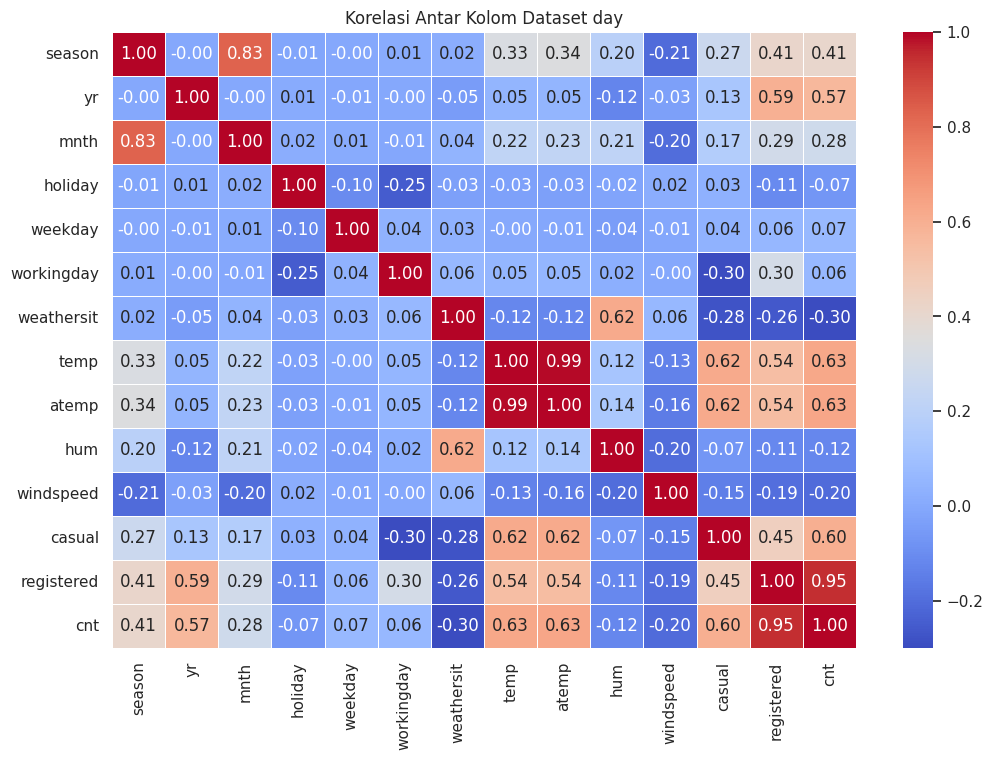

In [13]:
# Ubah kolom 'dteday' menjadi objek datetime jika belum.
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Ekstrak fitur numerik untuk perhitungan korelasi.
# Kecualikan 'dteday', 'instant', dan kolom non-numerik lainnya.
numerical_features = df_day.select_dtypes(include=['number']).columns
numerical_features = numerical_features.drop(['instant'])  # Hapus 'instant' jika tidak relevan untuk korelasi
corr_matrix = df_day[numerical_features].corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))  # Atur ukuran gambar
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Korelasi Antar Kolom Dataset day')  # Atur judul heatmap
plt.show()  # Tampilkan heatmap

Poin-poin penting dari matriks korelasi ini:
1. **Registered dan cnt** memiliki korelasi sangat tinggi (**0.95**), menunjukkan bahwa jumlah penyewa terdaftar sangat berperan dalam total penyewaan.
2. **Casual dan cnt** memiliki korelasi moderat positif (**0.60**), menunjukkan hubungan yang signifikan tetapi tidak sekuat pengguna terdaftar.
3. **Temperature (temp, atemp)** menunjukkan korelasi kuat dengan total penyewaan (**0.63** untuk keduanya), yang berarti semakin nyaman suhu, semakin banyak orang yang menyewa sepeda.
4. **Windspeed** memiliki korelasi negatif dengan penyewaan sepeda (**-0.20**), menunjukkan bahwa kecepatan angin yang lebih tinggi cenderung menurunkan jumlah penyewaan.
5. **Humidity (hum)** juga menunjukkan korelasi negatif dengan penyewaan sepeda (**-0.12**), menunjukkan bahwa kelembapan yang lebih tinggi cenderung sedikit mengurangi jumlah penyewaan.
6. **Weathersit** (kondisi cuaca) memiliki korelasi negatif moderat dengan **cnt** (**-0.30**), artinya cuaca yang buruk menurunkan jumlah penyewaan sepeda.
7. **Season** memiliki korelasi positif moderat dengan **cnt** (**0.41**), menunjukkan bahwa musim tertentu, seperti musim panas, mendorong lebih banyak orang untuk menyewa sepeda.


# Analisis

### 1. Bagaimana Hubungan antara jam dan jumlah pengguna

<ipython-input-14-651d4c35cc10>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hourly_rentals, palette='viridis')


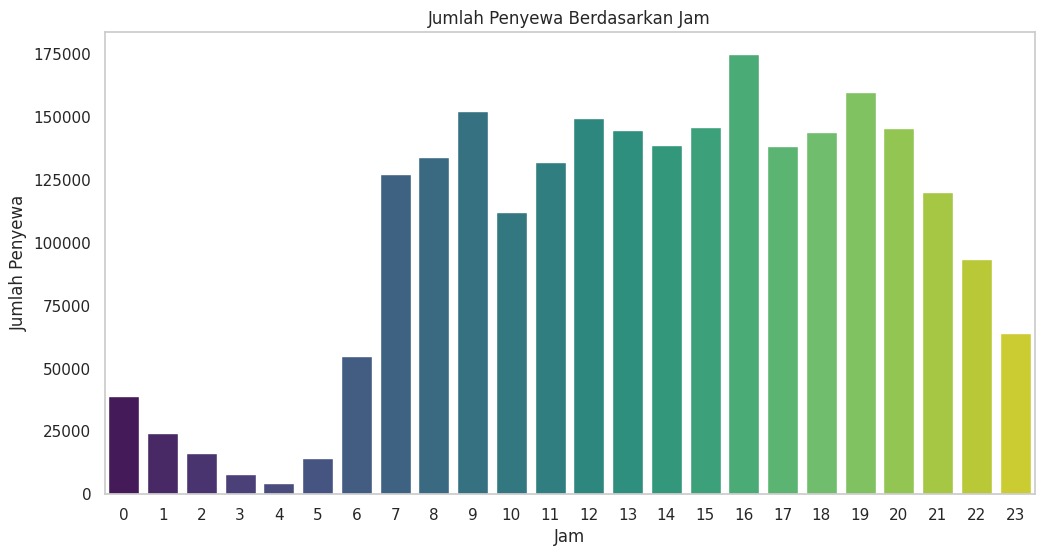

In [14]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Menghitung jumlah penyewa berdasarkan jam
hourly_rentals = df_hour.groupby('hr')['cnt'].sum().reset_index()

# Membuat plot untuk hubungan antara jam dan jumlah penyewa
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=hourly_rentals, palette='viridis')
plt.title('Jumlah Penyewa Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa')
plt.xticks(range(0, 24))  # Menampilkan semua jam
plt.grid(axis='y')
plt.show()

Gamabr di atas adalah visualisasi yang menunjukkan jumlah penyewa berdasarkan jam

* Sumbu X: Jam dalam sehari (dari 0 hingga 23).
* Sumbu Y: Jumlah penyewa (cnt) yang menyewa sepeda pada setiap jam.

Analisis Visual

* Grafik menunjukkan jam-jam puncak di mana jumlah penyewa meningkat, dan dapat membantu untuk memahami pola penggunaan sepeda sepanjang hari.
* Dapat dilihat jam-jam tertentu di mana penyewaan lebih tinggi, seperti pada pagi hari antara jam 8-10 dan sore hari antara jam 15-17, yang mungkin berkaitan dengan aktivitas kerja atau sekolah.

In [15]:
# Langkah 1: Menghitung korelasi antara jam dan jumlah penyewa
correlation = hourly_rentals['hr'].corr(hourly_rentals['cnt'])

# Langkah 2: Menghitung statistik deskriptif
statistics = hourly_rentals['cnt'].describe()

correlation, statistics

(0.642906422180932,
 count        24.000000
 mean     101693.875000
 std       56622.621308
 min        4428.000000
 25%       51131.500000
 50%      129782.500000
 75%      145153.250000
 max      174963.000000
 Name: cnt, dtype: float64)

#### Hasil Analisis
1. Korelasi

Korelasi antara jam dan jumlah penyewa: 0.64. Ini menunjukkan hubungan positif yang lumayan kuat antara jam dan jumlah penyewa. Artinya, seiring bertambahnya jam dalam sehari, jumlah penyewa cenderung meningkat lebih signifikan. Hal ini menunjukkan bahwa waktu berperan penting dalam menentukan pola penyewaan.

2. Statistik Deskriptif untuk Jumlah Penyewa (cnt)
* Count: 24 (jumlah jam yang diperiksa)
* Mean (Rata-rata): 101,693.88
* Standard Deviation (Standar Deviasi): 56,622.62
* Minimum: 4,428 (jumlah penyewa terendah di jam tertentu)
* 25th Percentile: 51,131.50
* Median (50th Percentile): 129,782.50
* 75th Percentile: 145,153.25
* Maximum: 174,963 (jumlah penyewa tertinggi di jam tertentu)

#### Interpretasi
* Rata-rata penyewa pada jam tertentu adalah 101,693.88, menunjukkan bahwa banyak pengguna sepeda beroperasi di waktu-waktu tertentu.
* Dengan standar deviasi sebesar 56,622.62, ini menunjukkan variasi yang signifikan dalam jumlah penyewa antar jamnya. Ini berarti ada jam-jam tertentu di mana penyewaan bisa sangat tinggi atau sangat rendah.

### 2. Seperti apa perbandingan penyewa di weekday, workingday dan holiday ?

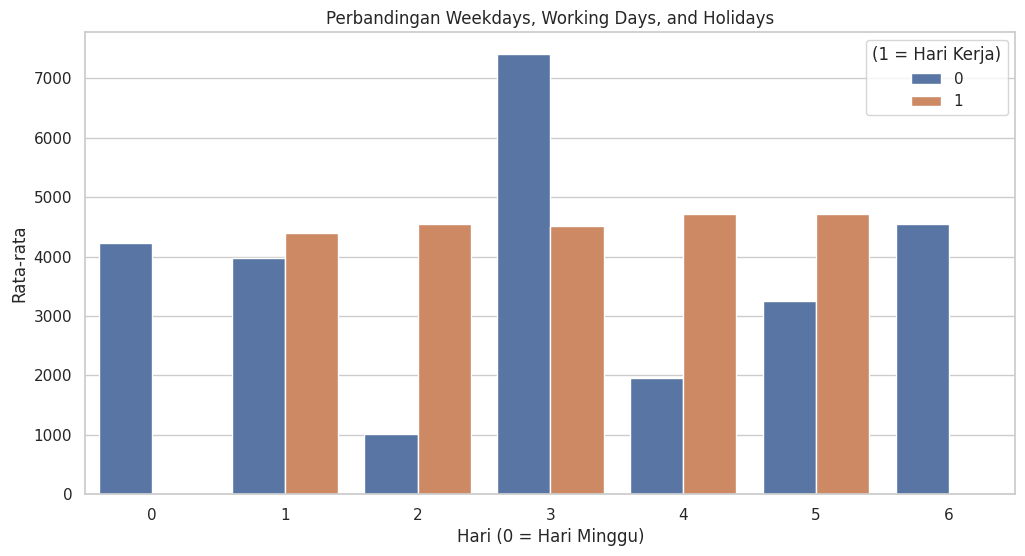

In [16]:
weekday_comparison = df_day.groupby(['weekday', 'workingday', 'holiday'])['cnt'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_comparison, x='weekday', y='cnt', hue='workingday')
plt.title("Perbandingan Weekdays, Working Days, and Holidays")
plt.xlabel("Hari (0 = Hari Minggu)")
plt.ylabel("Rata-rata")
plt.legend(title="(1 = Hari Kerja)")
plt.show()

Grafik perbandingan antara penyewa pada weekday (hari kerja), working day (hari efektif kerja), dan holiday (hari libur/non-kerja):

1. Working Day (Hari Kerja Efektif - Oranye)
    
  * Aktivitas penyewaan cukup stabil pada hari 1 hingga 5 (Senin hingga Jumat).
  * Penyewaan di hari kerja cenderung lebih tinggi dibandingkan dengan hari libur, terutama pada hari 2 (Selasa), 3 (Rabu), dan 4 (Kamis).

2. Non-Working Day (Libur - Biru)

  * Aktivitas penyewaan tetap terlihat signifikan pada hari Minggu (0), meski hari tersebut bukan hari kerja.
  * Hari 6 (Sabtu) juga menunjukkan penyewaan yang cukup tinggi, meski lebih rendah dibandingkan beberapa hari kerja efektif.

3. Puncak Aktivitas

  * Puncak aktivitas penyewaan terlihat pada hari Rabu (3), menunjukkan adanya pola lonjakan di tengah minggu, meskipun termasuk hari kerja.

4. Kesimpulan

  * Penyewaan cenderung lebih tinggi dan stabil pada hari kerja dibandingkan pada hari libur. Namun, akhir pekan (Minggu dan Sabtu) juga menunjukkan aktivitas yang tidak jauh berbeda, mengindikasikan permintaan yang kuat untuk aktivitas rekreasi atau layanan tertentu.

In [17]:
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

# Analisis ANOVA untuk pengaruh hari kerja terhadap jumlah penyewa
model = sm.ols('cnt ~ C(workingday)', data=df_day).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Analisis ANOVA untuk pengaruh hari dalam seminggu terhadap jumlah penyewa
model = sm.ols('cnt ~ C(weekday)', data=df_day).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

                     sum_sq     df         F    PR(>F)
C(workingday)  1.024604e+07    1.0  2.736742  0.098495
Residual       2.729289e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
C(weekday)  1.765902e+07    6.0  0.782862  0.583494
Residual    2.721876e+09  724.0       NaN       NaN


Dari hasil di atas dapat disimpulkan

* ANOVA berdasarkan workingday: Tidak ditemukan perbedaan signifikan dalam rata-rata penyewaan antara hari kerja dan akhir pekan.
* ANOVA berdasarkan weekday: Tidak ada perbedaan signifikan dalam rata-rata penyewaan antara hari-hari dalam seminggu.

### 3. Pada musim apa penyewa paling tinggi ?

<ipython-input-18-f9c6316facdc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_comparison, x='season', y='cnt', palette='viridis')


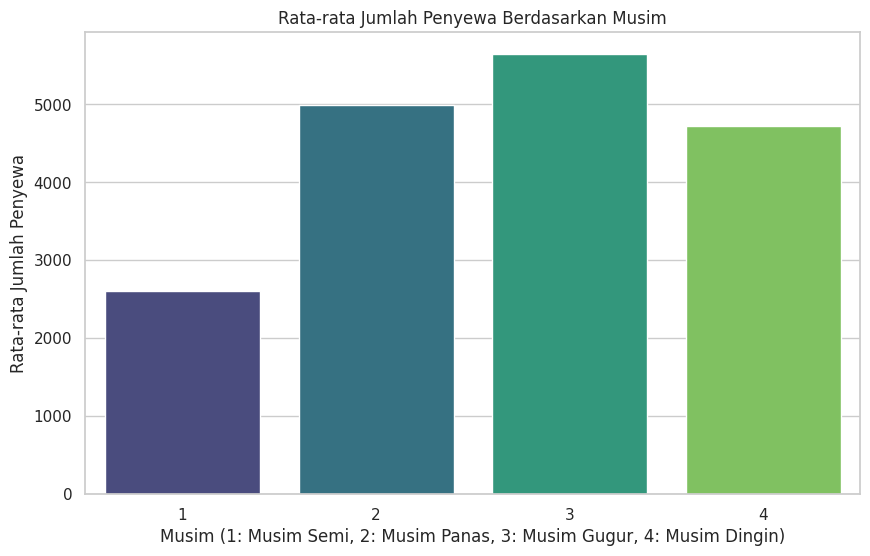

In [18]:
season_comparison = df_day.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=season_comparison, x='season', y='cnt', palette='viridis')
plt.title('Rata-rata Jumlah Penyewa Berdasarkan Musim')
plt.xlabel('Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)')
plt.ylabel('Rata-rata Jumlah Penyewa')
plt.show()

Grafik diatas menunjukkan rata-rata jumlah penyewa berdasarkan musim

1. Musim Semi (1)

    Memiliki jumlah penyewa terendah, dengan rata-rata sekitar 2500 penyewa.

2. Musim Panas (2)

    Terjadi peningkatan signifikan, dengan rata-rata jumlah penyewa mendekati 5000. Ini menunjukkan bahwa musim panas adalah salah satu periode dengan permintaan tinggi.

3. Musim Gugur (3)

    Puncak jumlah penyewa terjadi di musim ini, dengan rata-rata melebihi 5000. Ini mungkin mengindikasikan kondisi ideal untuk aktivitas luar ruangan atau rekreasi.

4. Musim Dingin (4)

    Jumlah penyewa sedikit menurun dibandingkan musim gugur, tetapi tetap lebih tinggi daripada musim semi, dengan rata-rata sekitar 4500.

Kesimpulan:

Musim gugur dan panas adalah periode dengan penyewaan tertinggi, sedangkan musim semi memiliki jumlah penyewa terendah. Ini mungkin mencerminkan pola musiman tertentu dalam permintaan layanan atau aktivitas yang disewakan, seperti rekreasi luar ruang yang lebih populer di cuaca hangat atau saat musim liburan.

### 4. Bagaimana tren penyewaan sepeda ?

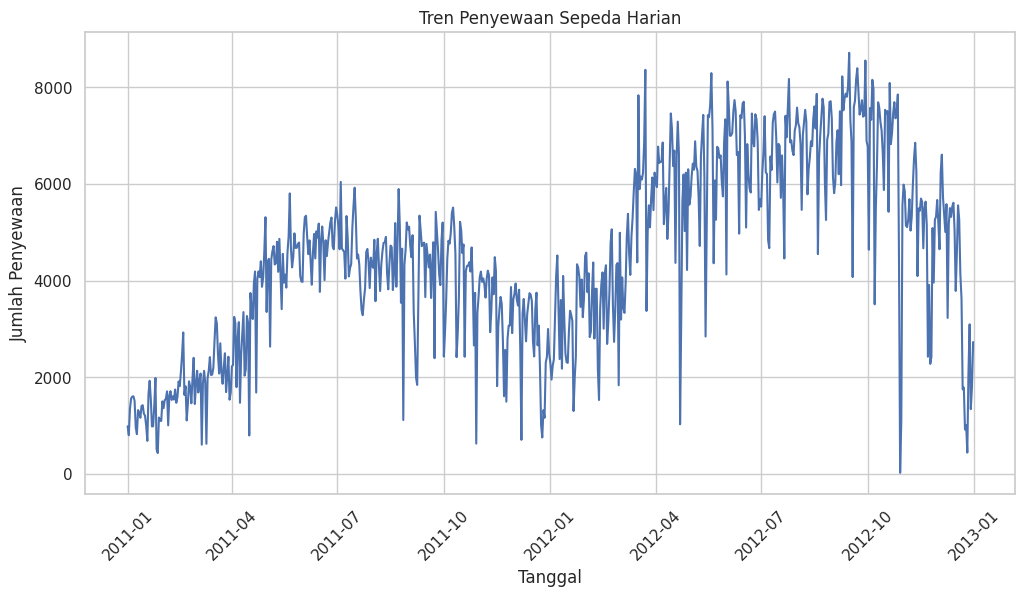

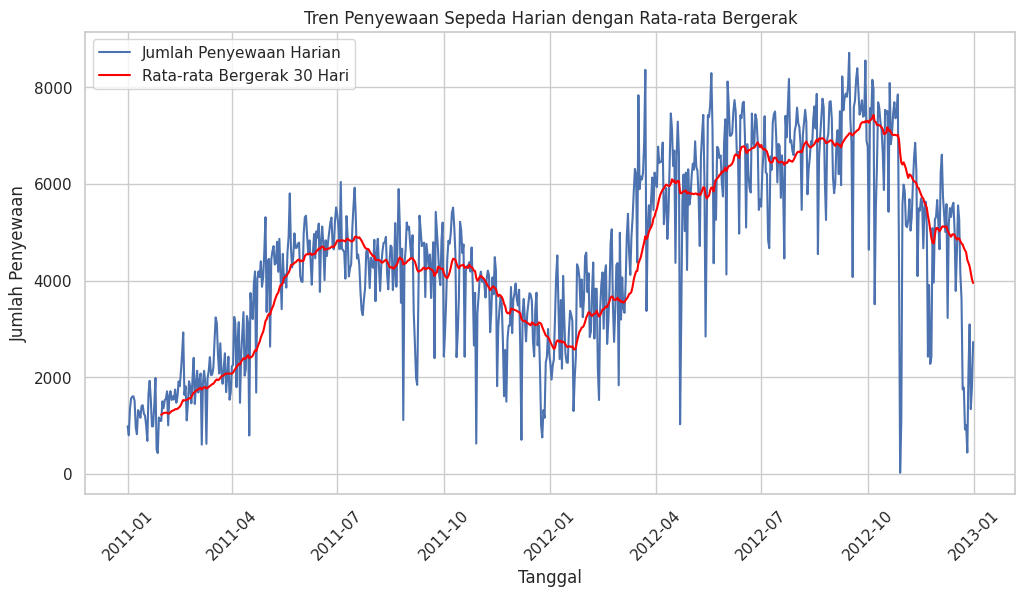

In [19]:
# Mengelompokkan data harian berdasarkan tanggal dan menghitung jumlah penyewaan
daily_rentals = df_day.groupby('dteday')['cnt'].sum()

# Membuat plot tren penyewaan sepeda
plt.figure(figsize=(12, 6))
plt.plot(daily_rentals.index, daily_rentals.values)
plt.title('Tren Penyewaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()

# Analisis tren dengan rolling average (rata-rata bergerak)
rolling_average = daily_rentals.rolling(window=30).mean()  # Rata-rata bergerak 30 hari

plt.figure(figsize=(12, 6))
plt.plot(daily_rentals.index, daily_rentals.values, label='Jumlah Penyewaan Harian')
plt.plot(rolling_average.index, rolling_average.values, label='Rata-rata Bergerak 30 Hari', color='red')
plt.title('Tren Penyewaan Sepeda Harian dengan Rata-rata Bergerak')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Penjelasan Grafik Pertama**
1. Tren Penyewaan Sepeda Harian
  * Grafik ini menunjukkan data harian penyewaan sepeda dari awal tahun 2011 hingga akhir 2012.
  * Terlihat adanya fluktuasi signifikan dari hari ke hari.
  * Ada beberapa pola musiman yang tampak
    * Peningkatan aktivitas mulai April hingga Oktober.
    * Penurunan tajam sekitar Desember hingga Februari.

2. Interpretasi
  * Musim panas dan awal gugur (sekitar Juli hingga September) menunjukkan aktivitas penyewaan tertinggi.
  * Musim dingin (akhir Desember hingga awal Februari) menampilkan penurunan signifikan, mungkin terkait dengan cuaca yang tidak mendukung aktivitas luar ruangan.

**Penjelasan Grafik Kedua**
1. Tren Penyewaan dengan Rata-rata Bergerak 30 Hari
  * Grafik ini menampilkan tren harian yang sama seperti grafik pertama, namun dengan tambahan garis rata-rata bergerak 30 hari (garis merah).
  * Garis merah ini memperhalus data harian untuk menunjukkan tren jangka panjang.

2. Temuan dari Grafik Kedua
  * Tren Umum: Ada pola peningkatan penyewaan dari awal 2011 hingga pertengahan 2011, diikuti oleh penurunan musiman saat musim dingin.
  * Pada tahun 2012, pola serupa terlihat: peningkatan signifikan mulai Maret dan mencapai puncak di Agustus–September, sebelum akhirnya menurun menjelang musim dingin.
  * Rata-rata bergerak menunjukkan tren kenaikan secara keseluruhan dari tahun 2011 hingga pertengahan 2012, tetapi dengan fluktuasi musiman.

**Kesimpulan**

Polarisasi Musiman penyewaan sepeda mencapai puncak selama bulan-bulan hangat (musim semi hingga awal musim gugur), sementara menurun drastis di musim dingin.
Rata-rata Bergerak membantu menunjukkan tren jangka panjang di luar fluktuasi harian. Ada peningkatan konsisten dalam penyewaan dari awal 2011 hingga pertengahan 2012, diikuti oleh penurunan musiman di akhir tahun 2012.
Grafik ini berguna untuk perencanaan bisnis, seperti mengidentifikasi waktu optimal untuk promosi atau penyediaan layanan tambahan, terutama saat permintaan sedang tinggi di musim panas dan gugur.

##### Menggunakan Dekomposisi untuk mengetahui tren

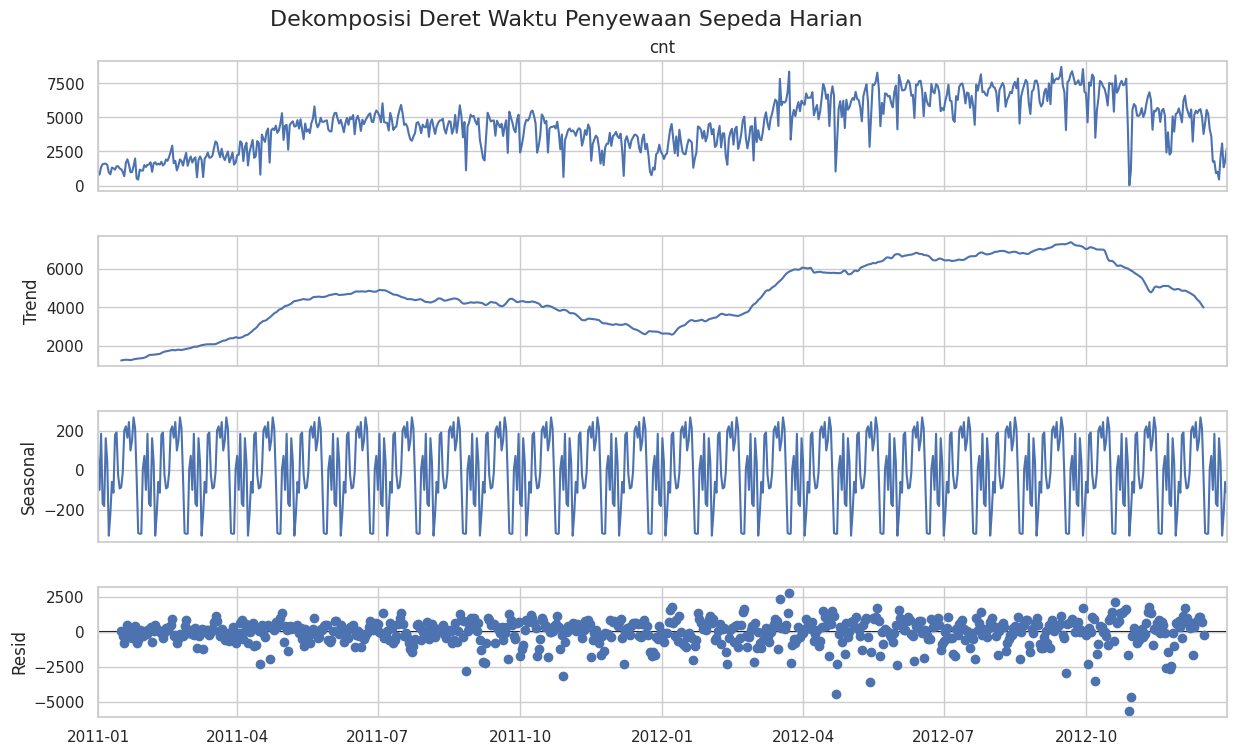

In [20]:
# Menggunakan model dekomposisi aditif untuk mengurai komponen tren, musiman, dan residual
from statsmodels.tsa.seasonal import seasonal_decompose

# Konversi kembali kolom 'dteday' ke format datetime dan set sebagai index
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.set_index('dteday', inplace=True)

# Melakukan dekomposisi deret waktu dengan model aditif (periode 30 hari untuk pola musiman bulanan)
decomposition = seasonal_decompose(df_day['cnt'], model='additive', period=30)

# Memvisualisasikan hasil dekomposisi (Tren, Musiman, dan Residual)
fig = decomposition.plot()
fig.set_size_inches(14, 8)  # Mengatur ukuran grafik
plt.suptitle('Dekomposisi Deret Waktu Penyewaan Sepeda Harian', fontsize=16)  # Judul
plt.show()  # Menampilkan grafik

1. Tren Jangka Panjang

  Terdapat peningkatan signifikan dalam jumlah penyewaan sepeda dari awal 2011 hingga pertengahan 2012. Namun, setelah itu terlihat sedikit penurunan menjelang akhir 2012. Hal ini bisa dipengaruhi oleh faktor eksternal seperti perubahan musim, kebijakan, atau kondisi cuaca.

2. Pola Musiman

  Pola musiman menunjukkan adanya fluktuasi berulang setiap bulan. Ini mengindikasikan bahwa penggunaan sepeda dipengaruhi oleh pola bulanan atau cuaca—misalnya, penyewaan bisa lebih tinggi di hari-hari cerah dan menurun di hari dingin atau hujan.

3. Fluktuasi dan Anomali (Residual)

  Komponen residual memperlihatkan adanya variasi acak yang tidak dijelaskan oleh tren atau pola musiman. Ini bisa disebabkan oleh peristiwa tak terduga seperti hujan deras, perayaan hari libur besar, atau gangguan operasional.

4. Waktu Puncak dan Penurunan

  Penggunaan sepeda cenderung meningkat selama bulan-bulan hangat dan menurun di musim dingin, yang terlihat dari pola tren dan musiman.

Implikasi
* Peningkatan armada dan layanan bisa dilakukan selama musim puncak (seperti musim gugur).
* Kebijakan promosi atau penawaran khusus mungkin diperlukan di musim dingin atau saat penurunan tren untuk menjaga kestabilan penyewaan.
* Manajemen perlu siap menghadapi anomali dengan fleksibilitas operasional jika terjadi perubahan mendadak.